### Download of MNIST data (Alternative to fetch_openml)

In [78]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

Download the following files from one of these websites:

*   https://github.com/cvdfoundation/mnist?tab=readme-ov-file (Mirror)
*   https://yann.lecun.com/exdb/mnist/ (Original data ressource)


In [79]:
f_train = gzip.open('train-images-idx3-ubyte.gz','r')
f_test = gzip.open('t10k-images-idx3-ubyte.gz','r')
f_train_labels = gzip.open('train-labels-idx1-ubyte.gz','r')
f_test_labels = gzip.open('t10k-labels-idx1-ubyte.gz','r')

In [80]:
image_size = 28
n_train = 60000
n_test = 10000

In [81]:
byte_offset = 16
byte_offset_labels = 8

In [82]:
def read_data(f, image_size, n, byte_offset):
    f.read(byte_offset)
    buf = f.read(image_size * image_size * n)
    data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
    data = data.reshape(n, image_size, image_size, 1)
    return data

def read_labels(f, n, byte_offset_labels):
    f.read(byte_offset_labels)
    buf = f.read(n)
    labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    #data = data.reshape(n, image_size, image_size, 1)
    return labels

In [83]:
train_data = read_data(f_train, image_size, n_train, byte_offset)
test_data = read_data(f_test, image_size, n_test, byte_offset)
train_labels = read_labels(f_train_labels, n_train, byte_offset_labels)
test_labels = read_labels(f_test_labels, n_test, byte_offset_labels)

In [84]:
train_data.shape

(60000, 28, 28, 1)

In [85]:
test_data.shape

(10000, 28, 28, 1)

In [86]:
train_labels.shape

(60000,)

In [87]:
test_labels.shape

(10000,)

label =  5


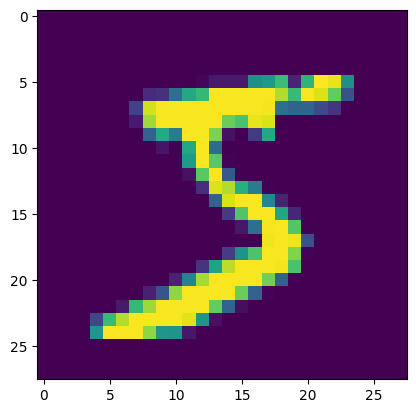

label =  3


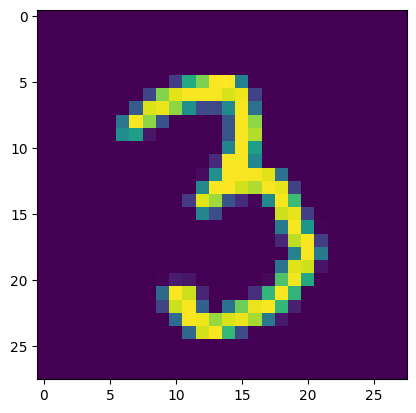

label =  8


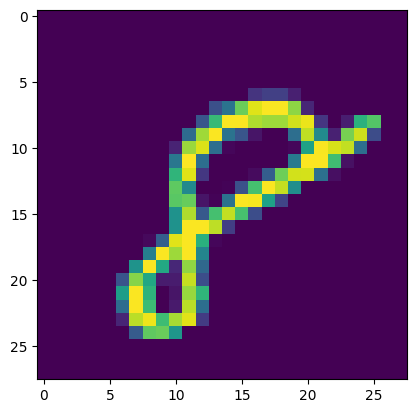

In [93]:
# Test plotting some images
for idx in [0, 30000, 59999]:
    image = np.asarray(train_data[idx]).squeeze()
    print("label = ", train_labels[idx])
    plt.imshow(image)
    plt.show()